# Logistic Regression for 2 and 3 class data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [4]:
election_data = pd.read_stata('ARM_Data/nes/nes5200_processed_voters_realideo.dta')

In [21]:
ED1992 = election_data.loc[election_data['year'] == 1992]

In [31]:
Vote_Income = DataFrame(ED1992,columns=['presvote','income'])

Exercise: (a) clean up the NaN, (b) extract only those that voted for republican or democrat. (c) solve a 2-class logistic regression.

In [40]:
arsenic_all = pd.read_stata('ARM_Data/arsenic/all.dta')
arsenic_wells = pd.read_csv('ARM_Data/arsenic/wells.dat', delimiter=' ')

In [132]:
arsenic_wells

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14
6,1,3.90,69.517998,1,9
7,1,2.97,80.710999,1,4
8,1,3.24,55.146000,0,10
9,1,3.28,52.646999,1,0
10,1,2.52,75.071999,1,0


Let's plot arsenic and distance against each other, for both the households that switched and those that did not, and let's see what happens.

In [133]:
well_switch = arsenic_wells.loc[arsenic_wells['switch']==1]
well_noswitch = arsenic_wells.loc[arsenic_wells['switch']==0]
Xs = well_switch[['arsenic','dist']].values
Xns = well_noswitch[['arsenic','dist']].values

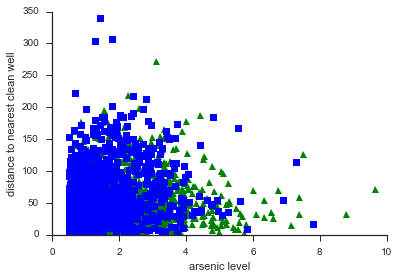

In [134]:
plt.plot(Xs[:,0],Xs[:,1],'g^')
plt.plot(Xns[:,0],Xns[:,1],'bs')
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')
sns.despine()

A Python note: we can also use the labels directly as colors instead of manually separating out the classes:

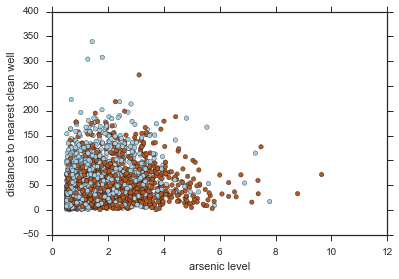

In [135]:
X = arsenic_wells[['arsenic','dist']].values
Y = arsenic_wells['switch'].values
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')

Now we fit a logistic regression to the data, and plot the decision boundary.

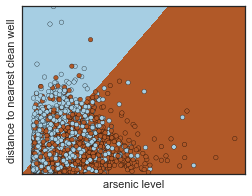

In [136]:
# create the logistic regression object
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# A 3-class example

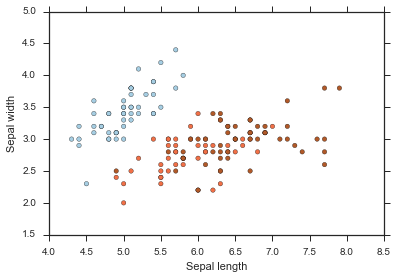

In [138]:
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features.
Y_iris = iris.target

# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

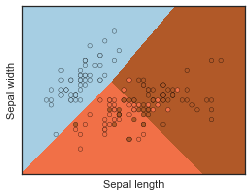

In [139]:
# create the logistic regression object
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_iris, Y_iris)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X_iris[:, 0].min() - .5, X_iris[:, 0].max() + .5
y_min, y_max = X_iris[:, 1].min() - .5, X_iris[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()